In [109]:
import statistics

In [110]:
import pandas as pd

In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from helpers import *
from regression import *

In [113]:
ELO_DATE = '2025-11-10'

In [114]:
NUMBER_OF_SIMS = 10000

In [115]:
# download_elo_data(ELO_DATE)

In [116]:
# api_get_leagues()

In [117]:
# find_league_id('GB-ENG', 'Premier League')

# Premier League: 39
# Brazil Serie A: 71
# Ekstraklasa: 106
# I Liga [Poland]: 107
# Polish Cup: 108
# II Liga - East [?] [Poland]: 109

In [118]:
# df = get_api_teams_and_elo_from_clubelo(ELO_DATE, 'ENG')
# df.head(20)

In [119]:
# elo_drift_df = pd.merge(df, df2, how='inner', on='Club', suffixes=('_before', '_after'))
# elo_drift_df['Elo_Drift'] = elo_drift_df['Elo_after'] - elo_drift_df['Elo_before']
# season_stdev = statistics.stdev(elo_drift_df['Elo_Drift'])
# print(season_stdev)
# elo_drift_df.head(20)

             Team  Rating Country
0      STURM GRAZ    78.7     AUT
1        SALZBURG    78.4     AUT
2  WOLFSBERGER AC    76.9     AUT
3           RAPID    74.1     AUT
4    AUSTRIA WIEN    73.5     AUT
Team        object
Rating     float64
Country     object
dtype: object
452 ELO teams matched.
18 unmatched ELO teams found, see transformed/elo/elo_unmatched.csv:
464 Opta teams matched.
474 unmatched Opta teams found, see transformed/opta/opta_unmatched.csv:
415
415
    ELO_name            Opta_name Country  Level      Elo  Rating
0    Arsenal              Arsenal     ENG      1  2032.83   100.0
1   Paris Sg  Paris Saint-Germain     FRA      1  1987.78    96.1
2  Liverpool            Liverpool     ENG      1  1974.46    97.1
3   Man City      Manchester City     ENG      1  1969.44    97.5
4     Bayern       Bayern München     GER      1  1967.82    98.3
0.930543577794924
y = 24.014839969515815 * x + -347.7154248022616
    ELO_name            Opta_name Country  Level      Elo  Rating


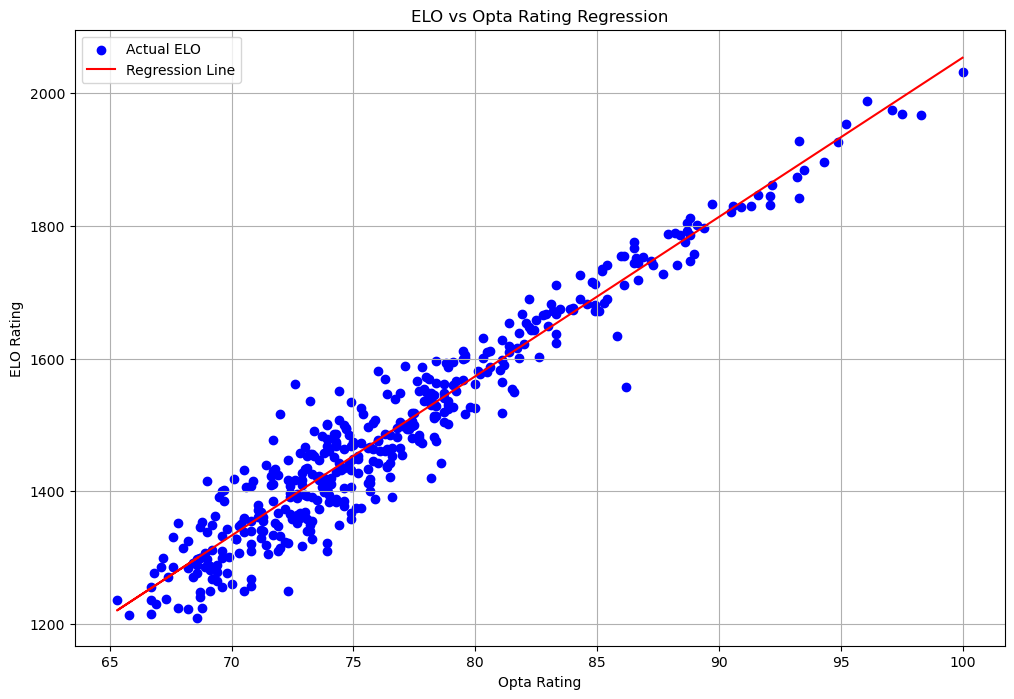

In [120]:
main_regression("POL", 1)

In [121]:
standings_df = build_historical_standings_table_after_at_most_n_rounds(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE)
standings_df.head(20)

                Opta_name      Elo               Club
0   Jagiellonia Białystok  1551.86        Jagiellonia
1       Raków Częstochowa  1573.47  Raków Częstochowa
2             Lech Poznań  1542.25        Lech Poznan
3          Legia Warszawa  1518.24     Legia Warszawa
4           Górnik Zabrze  1535.05      Gornik Zabrze
5          Pogoń Szczecin  1484.62     Pogon Szczecin
6                Cracovia  1501.43    Cracovia Krakow
7           Korona Kielce  1470.21      Korona Kielce
8           Piast Gliwice  1417.38      Piast Gliwice
9          Radomiak Radom  1436.59     Radomiak Radom
10         Zagłębie Lubin  1429.38     Zaglebie Lubin
11           Gks Katowice  1443.79       GKS Katowice
12            Wisła Płock  1460.60        Wisla Plock
13            Widzew Łódź  1405.37        Widzew Łódź
14           Motor Lublin  1412.57       Motor Lublin
15          Lechia Gdańsk  1398.16      Lechia Gdansk
16            Arka Gdynia  1388.56        Arka Gdynia
17              Nieciecza  1

,Club,Elo,Points,Games played
1,Gornik Zabrze,1535.05,29,15
2,Jagiellonia,1551.86,27,14
3,Wisla Plock,1460.60,26,14
4,Raków Częstochowa,1573.47,23,14
5,Radomiak Radom,1436.59,22,15
6,Cracovia Krakow,1501.43,22,14
7,Zaglebie Lubin,1429.38,21,14
8,Lech Poznan,1542.25,21,14
9,Korona Kielce,1470.21,20,15
10,Arka Gdynia,1388.56,18,15


In [122]:
standings_df['Points'] = standings_df.apply(lambda x: x['Points']-5 if x['Club'] == 'Lechia Gdansk' else x['Points'], axis=1)
standings_df.head(20)

,Club,Elo,Points,Games played
1,Gornik Zabrze,1535.05,29,15
2,Jagiellonia,1551.86,27,14
3,Wisla Plock,1460.60,26,14
4,Raków Częstochowa,1573.47,23,14
5,Radomiak Radom,1436.59,22,15
6,Cracovia Krakow,1501.43,22,14
7,Zaglebie Lubin,1429.38,21,14
8,Lech Poznan,1542.25,21,14
9,Korona Kielce,1470.21,20,15
10,Arka Gdynia,1388.56,18,15


In [123]:
float(round(standings_df['Points'].sum() / standings_df['Games played'].sum(), 2))

1.35

In [124]:
sample_season = simulate_season_after_n_rounds(league_id=106, season=2025, standings_df=standings_df)
sample_season.head(20)

,Club,Points,Elo,Games played
1,Jagiellonia,68,1551.86,34
3,Raków Częstochowa,65,1573.47,34
7,Lech Poznan,60,1542.25,34
0,Gornik Zabrze,53,1535.05,34
6,Zaglebie Lubin,52,1429.38,34
2,Wisla Plock,51,1460.60,34
13,Pogon Szczecin,51,1484.62,34
5,Cracovia Krakow,49,1501.43,34
8,Korona Kielce,47,1470.21,34
15,Motor Lublin,45,1412.57,34


In [125]:
float(round(sample_season['Points'].sum() / sample_season['Games played'].sum(), 2))

1.36

In [126]:
results = run_multiple_sims(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, stdev=20, standings_df=standings_df)
results.head(20)

                 Club      Elo  Points  Games played
1       Gornik Zabrze  1535.05      29            15
2         Jagiellonia  1551.86      27            14
3         Wisla Plock  1460.60      26            14
4   Raków Częstochowa  1573.47      23            14
5      Radomiak Radom  1436.59      22            15
6     Cracovia Krakow  1501.43      22            14
7      Zaglebie Lubin  1429.38      21            14
8         Lech Poznan  1542.25      21            14
9       Korona Kielce  1470.21      20            15
10        Arka Gdynia  1388.56      18            15
11      Lechia Gdansk  1398.16      13            15
12        Widzew Łódź  1405.37      17            15
13     Legia Warszawa  1518.24      17            14
14     Pogon Szczecin  1484.62      17            15
15       GKS Katowice  1443.79      17            15
16       Motor Lublin  1412.57      16            14
17          Nieciecza  1352.54      13            15
18      Piast Gliwice  1417.38      11        

100%|██████████| 10000/10000 [01:25<00:00, 117.52it/s]

10000 simulations
1 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jagiellonia,3455,3217,34.6,32.2,2.89,3.11
2,Gornik Zabrze,2668,2446,26.7,24.5,3.75,4.09
3,Raków Częstochowa,2255,2072,22.6,20.7,4.43,4.83
4,Lech Poznan,577,509,5.8,5.1,17.33,19.65
5,Wisla Plock,402,331,4.0,3.3,24.88,30.21
6,Cracovia Krakow,390,337,3.9,3.4,25.64,29.67
7,Legia Warszawa,104,88,1.0,0.9,96.15,113.64
8,Korona Kielce,50,39,0.5,0.4,200.00,256.41
9,Zaglebie Lubin,42,35,0.4,0.4,238.10,285.71
10,Radomiak Radom,31,24,0.3,0.2,322.58,416.67


In [127]:
results = run_multiple_sims(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, stdev=20, standings_df=standings_df)
results.head(20)

                 Club      Elo  Points  Games played
1       Gornik Zabrze  1535.05      29            15
2         Jagiellonia  1551.86      27            14
3         Wisla Plock  1460.60      26            14
4   Raków Częstochowa  1573.47      23            14
5      Radomiak Radom  1436.59      22            15
6     Cracovia Krakow  1501.43      22            14
7      Zaglebie Lubin  1429.38      21            14
8         Lech Poznan  1542.25      21            14
9       Korona Kielce  1470.21      20            15
10        Arka Gdynia  1388.56      18            15
11      Lechia Gdansk  1398.16      13            15
12        Widzew Łódź  1405.37      17            15
13     Legia Warszawa  1518.24      17            14
14     Pogon Szczecin  1484.62      17            15
15       GKS Katowice  1443.79      17            15
16       Motor Lublin  1412.57      16            14
17          Nieciecza  1352.54      13            15
18      Piast Gliwice  1417.38      11        

100%|██████████| 10000/10000 [01:23<00:00, 120.18it/s]

10000 simulations
3 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Jagiellonia,7453,7239,74.5,72.4,1.34,1.38
2,Gornik Zabrze,6881,6622,68.8,66.2,1.45,1.51
3,Raków Częstochowa,6262,5980,62.6,59.8,1.60,1.67
4,Lech Poznan,2770,2536,27.7,25.4,3.61,3.94
5,Wisla Plock,2153,1964,21.5,19.6,4.64,5.09
6,Cracovia Krakow,2124,1915,21.2,19.2,4.71,5.22
7,Legia Warszawa,889,786,8.9,7.9,11.25,12.72
8,Korona Kielce,467,401,4.7,4.0,21.41,24.94
9,Zaglebie Lubin,329,282,3.3,2.8,30.40,35.46
10,Radomiak Radom,311,257,3.1,2.6,32.15,38.91


In [128]:
results = run_multiple_sims(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=3, reverse=True, stdev=20, standings_df=standings_df)
results.head(20)

                 Club      Elo  Points  Games played
1       Gornik Zabrze  1535.05      29            15
2         Jagiellonia  1551.86      27            14
3         Wisla Plock  1460.60      26            14
4   Raków Częstochowa  1573.47      23            14
5      Radomiak Radom  1436.59      22            15
6     Cracovia Krakow  1501.43      22            14
7      Zaglebie Lubin  1429.38      21            14
8         Lech Poznan  1542.25      21            14
9       Korona Kielce  1470.21      20            15
10        Arka Gdynia  1388.56      18            15
11      Lechia Gdansk  1398.16      13            15
12        Widzew Łódź  1405.37      17            15
13     Legia Warszawa  1518.24      17            14
14     Pogon Szczecin  1484.62      17            15
15       GKS Katowice  1443.79      17            15
16       Motor Lublin  1412.57      16            14
17          Nieciecza  1352.54      13            15
18      Piast Gliwice  1417.38      11        

100%|██████████| 10000/10000 [01:25<00:00, 116.82it/s]

10000 simulations
3 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Nieciecza,7205,6966,72.0,69.7,1.39,1.44
2,Lechia Gdansk,5659,5374,56.6,53.7,1.77,1.86
3,Piast Gliwice,4957,4654,49.6,46.5,2.02,2.15
4,Motor Lublin,2811,2571,28.1,25.7,3.56,3.89
5,Widzew Łódź,2789,2535,27.9,25.4,3.59,3.94
6,Arka Gdynia,2543,2296,25.4,23.0,3.93,4.36
7,GKS Katowice,1752,1542,17.5,15.4,5.71,6.49
8,Pogon Szczecin,688,592,6.9,5.9,14.53,16.89
9,Zaglebie Lubin,501,416,5.0,4.2,19.96,24.04
10,Radomiak Radom,410,346,4.1,3.5,24.39,28.90


In [129]:
results = run_multiple_sims(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE, number_of_sims=NUMBER_OF_SIMS, number_of_winning_places=1, reverse=True, stdev=20, standings_df=standings_df)
results.head(20)

                 Club      Elo  Points  Games played
1       Gornik Zabrze  1535.05      29            15
2         Jagiellonia  1551.86      27            14
3         Wisla Plock  1460.60      26            14
4   Raków Częstochowa  1573.47      23            14
5      Radomiak Radom  1436.59      22            15
6     Cracovia Krakow  1501.43      22            14
7      Zaglebie Lubin  1429.38      21            14
8         Lech Poznan  1542.25      21            14
9       Korona Kielce  1470.21      20            15
10        Arka Gdynia  1388.56      18            15
11      Lechia Gdansk  1398.16      13            15
12        Widzew Łódź  1405.37      17            15
13     Legia Warszawa  1518.24      17            14
14     Pogon Szczecin  1484.62      17            15
15       GKS Katowice  1443.79      17            15
16       Motor Lublin  1412.57      16            14
17          Nieciecza  1352.54      13            15
18      Piast Gliwice  1417.38      11        

100%|██████████| 10000/10000 [01:18<00:00, 127.28it/s]

10000 simulations
1 winning places


,Club,RTB Wins,LTB Wins,% RTB winrate,% LTB winrate,Exp. RTB odds,Exp. LTB odds
1,Nieciecza,3715,3439,37.2,34.4,2.69,2.91
2,Lechia Gdansk,2123,1929,21.2,19.3,4.71,5.18
3,Piast Gliwice,1677,1505,16.8,15.0,5.96,6.64
4,Motor Lublin,667,570,6.7,5.7,14.99,17.54
5,Widzew Łódź,616,533,6.2,5.3,16.23,18.76
6,Arka Gdynia,587,498,5.9,5.0,17.04,20.08
7,GKS Katowice,329,271,3.3,2.7,30.40,36.90
8,Pogon Szczecin,106,83,1.1,0.8,94.34,120.48
9,Zaglebie Lubin,62,46,0.6,0.5,161.29,217.39
10,Korona Kielce,49,42,0.5,0.4,204.08,238.10
